In [306]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
%matplotlib inline

In [307]:
df = pd.read_csv("train.csv")

In [308]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C


In [309]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [310]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
108,0,3,male,38.0,0,0,7.8958,S
186,1,3,female,NaN,1,0,15.5000,Q
573,1,3,female,NaN,0,0,7.7500,Q
634,0,3,female,9.0,3,2,27.9000,S
504,1,1,female,16.0,0,0,86.5000,S


In [311]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

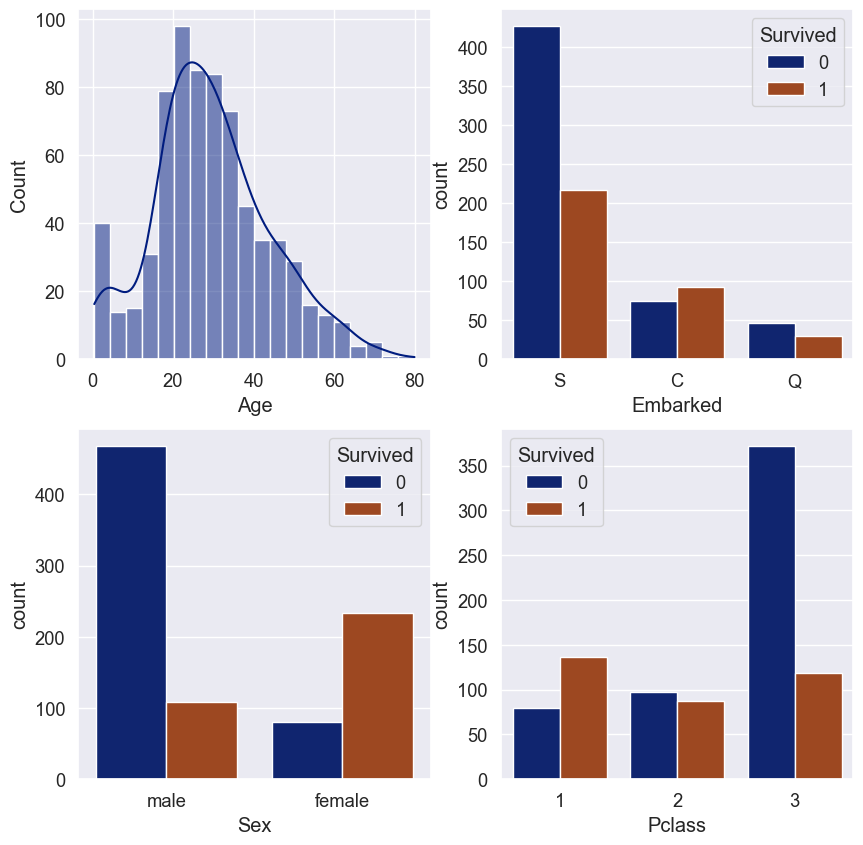

In [312]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
sns.countplot(x=df['Embarked'], hue=df['Survived'], ax=axes[0, 1])
sns.countplot(x=df['Sex'], hue=df['Survived'], ax=axes[1, 0])
sns.countplot(x=df['Pclass'], hue=df['Survived'], ax=axes[1, 1])

## Insight-1

`Replace Age with Median`

`Replace Embarked with max_frequent`

`Females are prioritized over Males`

`PClass is Imp as Most of the people die in 3rd class`

In [313]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

` We can Conclude PClass using Fare a person has spent and thus this will also determine if passenger will survive or not `

# Training Model to predict

* Encode sex and embarked
* Scale Fare column
* Classification Problem
    * Can use Decision Tree,Logistic-Regression,SVM-Classifier 

In [314]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [315]:
X,y=df.drop(['Survived'],axis=1),df['Survived']

In [316]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [317]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [318]:
# Imputing Missing vals of Age and Embarked Columns
imputer = ColumnTransformer([
    ('age_imputer', SimpleImputer(strategy='mean'), [2]),
    ('embarked_imputer', SimpleImputer(strategy='most_frequent'), [6])
], remainder='passthrough')

In [319]:
# OneHotEncoding over Sex and Embarked
encoder = ColumnTransformer([
    ('sex_embarked_encoder', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), [1, 6])
], remainder='passthrough')

In [320]:
# Scale
scaler = ColumnTransformer([
    ('scaler', StandardScaler(), slice(0,10))
])

In [321]:
# Model for prediction
model=DecisionTreeClassifier(max_depth=5)
# model=SVC()
# model=LogisticRegression()

In [322]:
# Creating SKLearn PipeLine
pipe=Pipeline([
    ('imputer',imputer),
    ('encoder',encoder),
    ('scaler',scaler),
    ('clf',model)
])

In [323]:
from sklearn import set_config
set_config(display='diagram')

In [324]:
# Fitting our Model
pipe.fit(X,y)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_imputer',
                                                  SimpleImputer(), [2]),
                                                 ('embarked_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sex_embarked_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('scaler',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  slice(0, 10, None))])),
                ('clf', DecisionTreeClassifier(max_depth=5))])

In [325]:
y_train_pred=pipe.predict(X)
y_train_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [326]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y,y_train_pred)
print(f"Models-accuracy:{model_accuracy}")

Models-accuracy:0.6386083052749719


In [327]:
test_df=pd.read_csv('test.csv',usecols=["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"])
test_df.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [328]:
y_test_pred=pipe.predict(test_df)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [329]:
test_df["Survived"]=y_test_pred
test_df.sample(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
193,1085,2,male,61.0,0,0,12.3500,Q,0
240,1132,1,female,55.0,0,0,27.7208,C,1
165,1057,3,female,26.0,1,1,22.0250,S,0
23,915,1,male,21.0,0,1,61.3792,C,1
130,1022,3,male,32.0,0,0,8.0500,S,0
30,922,2,male,50.0,1,0,26.0000,S,0
294,1186,3,male,36.0,0,0,9.5000,S,0
271,1163,3,male,NaN,0,0,7.7500,Q,0
144,1036,1,male,42.0,0,0,26.5500,S,0
89,981,2,male,2.0,1,1,23.0000,S,0


In [330]:
results=test_df[["PassengerId","Survived"]]
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [331]:
# Run-This to make Output file
# results.to_csv("titanic-test-res.csv",index = False)